# OISSTv2 Live Update Testing

This notebook is for documenting the steps to build a single annual OISSTv2 file using update caches. The steps were developed initially in `Update_01_Download_OISST` then the steps were abstracted into functions and placed into the `oisstools.py` module. This notebook will follow the same steps but with much less code, hopefully with less room for error.

This notebook exists to document the processing steps, but has since been replaced by script workflows using prefect in `oisst_prefect.py`.

In [6]:
# Libraries
from bs4 import BeautifulSoup
import requests
import os
import xarray as xr
import datetime
import oisstools as ot


#### 1. Set workspace
workspace = "local"
box_root = ot.set_workspace("local")
_cache_root = ot.set_cache_root(box_root)


#### 2. What Months are we checking?
this_month = ot.get_update_month(return_this_month = True)
last_month = ot.get_update_month(return_this_month = False)
update_yr  = ot.check_update_yr(for_this_month = True)


#### 3. Print Last Update
print(f"Working via directory at: {box_root}")
print(f"Updated using months:     {last_month} & {this_month}")

Working via directory at: /Users/akemberling/Box/
Updated using months:     04 & 05


## 1. Update Last Month

In [7]:
# Use cache_oisst function to update cache for last month
ot.cache_oisst(cache_month = last_month, 
               update_yr = update_yr, 
               workspace = workspace, 
               verbose = True)

Caching Daily NETCDF File: oisst-avhrr-v02r01.20210401.nc
Caching Daily NETCDF File: oisst-avhrr-v02r01.20210402.nc
Caching Daily NETCDF File: oisst-avhrr-v02r01.20210403.nc
Caching Daily NETCDF File: oisst-avhrr-v02r01.20210404.nc
Caching Daily NETCDF File: oisst-avhrr-v02r01.20210405.nc
Caching Daily NETCDF File: oisst-avhrr-v02r01.20210406.nc
Caching Daily NETCDF File: oisst-avhrr-v02r01.20210407.nc
Caching Daily NETCDF File: oisst-avhrr-v02r01.20210408.nc
Caching Daily NETCDF File: oisst-avhrr-v02r01.20210409.nc
Caching Daily NETCDF File: oisst-avhrr-v02r01.20210410.nc
Caching Daily NETCDF File: oisst-avhrr-v02r01.20210411.nc
Caching Daily NETCDF File: oisst-avhrr-v02r01.20210412.nc
Caching Daily NETCDF File: oisst-avhrr-v02r01.20210413.nc
Caching Daily NETCDF File: oisst-avhrr-v02r01.20210414.nc
Caching Daily NETCDF File: oisst-avhrr-v02r01.20210415.nc
Caching Daily NETCDF File: oisst-avhrr-v02r01.20210416.nc
Caching Daily NETCDF File: oisst-avhrr-v02r01.20210417.nc
Caching Daily 

## 2. Update This Month

In [8]:
# Use cache_oisst function to update cache for last month
ot.cache_oisst(cache_month = this_month, 
               update_yr = update_yr, 
               workspace = workspace, 
               verbose = True)

Caching Daily NETCDF File: oisst-avhrr-v02r01.20210501.nc
Caching Daily NETCDF File: oisst-avhrr-v02r01.20210502.nc
Caching Daily NETCDF File: oisst-avhrr-v02r01.20210503.nc
Caching Daily NETCDF File: oisst-avhrr-v02r01.20210504.nc
Caching Daily NETCDF File: oisst-avhrr-v02r01.20210505.nc
Caching Daily NETCDF File: oisst-avhrr-v02r01.20210506.nc
Caching Daily NETCDF File: oisst-avhrr-v02r01.20210507.nc
Caching Daily NETCDF File: oisst-avhrr-v02r01.20210508.nc
Caching Daily NETCDF File: oisst-avhrr-v02r01.20210509.nc
Caching Daily NETCDF File: oisst-avhrr-v02r01.20210510.nc
Caching Daily NETCDF File: oisst-avhrr-v02r01.20210511_preliminary.nc
Caching Daily NETCDF File: oisst-avhrr-v02r01.20210512_preliminary.nc
Caching Daily NETCDF File: oisst-avhrr-v02r01.20210513_preliminary.nc
Caching Daily NETCDF File: oisst-avhrr-v02r01.20210514_preliminary.nc
Caching Daily NETCDF File: oisst-avhrr-v02r01.20210515_preliminary.nc
Caching Daily NETCDF File: oisst-avhrr-v02r01.20210516_preliminary.nc


## 3. Build Annual File

In [9]:
# Assemble the annual file
oisst_update = ot.build_annual_from_cache(last_month = last_month, 
                                          this_month = this_month, 
                                          workspace = workspace, 
                                          verbose = True)

## 4. Check Annual file

Want to see consistency in the dimensions, and data from the beginning of the year through to the update month.

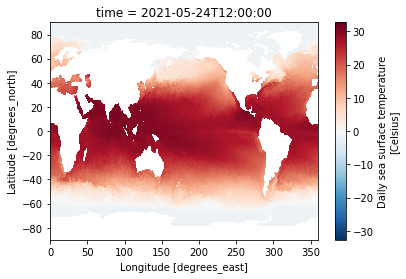

In [10]:
oisst_update
oisst_update.isel(time = -1).sst.plot()

## 5. Export Update

In [12]:
# export update using same file pattern as everything else
ot.export_annual_update(cache_root = _cache_root,
                       update_yr = update_yr,
                       oisst_update = oisst_update)

File Saved to /Users/akemberling/Box/RES_Data/OISST/oisst_mainstays/annual_observations/sst.day.mean.2021.v2.nc


In [13]:
# # Build out destination folder:
# out_folder       = f"{_cache_root}annual_observations/"
# naming_structure = f"sst.day.mean.{update_yr}.v2.nc"
# out_path         = f"{out_folder}{naming_structure}"
# print(f"Output Path Set to:")
# print(f"{out_path}")

In [14]:
# # Save File to Output Path
# oisst_update.to_netcdf(path = out_path)
# print(f"Saving / Overwriting File:")
# print(f"{out_path}")